# Wine Quality Prediction – Machine Learning

In [ ]:
#import necessary packages

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import warnings
warnings.filterwarnings('ignore')


In [77]:
#read data and get first 5 rows

wine_data = pd.read_csv("C:/Users/hp/Downloads/winequalityN.csv")
first_5_rows = wine_data.head(5)
print(first_5_rows)

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [78]:
#inspect data
print("Shape ===>")
print(wine_data.shape)
print("\n\nCoumn names ===>")
print(wine_data.columns)

Shape ===>
(6497, 13)


Coumn names ===>
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [79]:
#explore the descriptive statistical measures of the dataset.
print(wine_data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

# Exploratory Data Analysis

In [80]:
#check missing values if there are any
missing_cols = wine_data.isna().sum()
print(missing_cols)
wine_data=wine_data.fillna(wine_data.mean())
missing_cols = wine_data.isna().sum()
print("\n\nrecheck ===> ",missing_cols)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


recheck ===>  type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<AxesSubplot:ylabel='Frequency'>

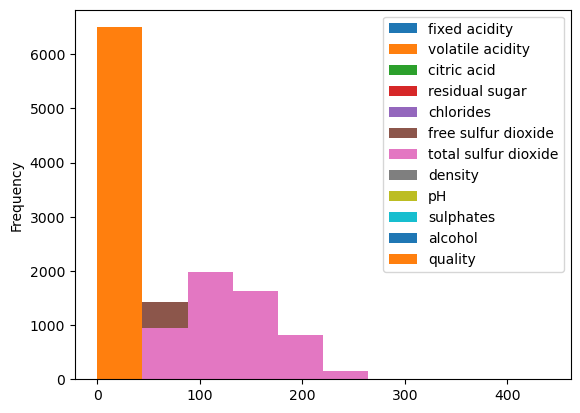

In [81]:
#Let’s draw the histogram to visualise the distribution of the data with continuous values in the columns of the dataset.
wine_data.plot.hist()

<AxesSubplot:xlabel='quality', ylabel='count'>

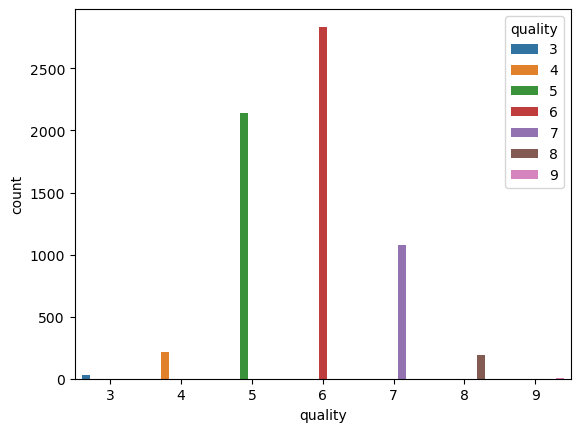

In [82]:
#Now let’s draw the count plot to visualise the number data for each quality of wine.
sb.countplot(data=wine_data, x="quality", hue="quality")

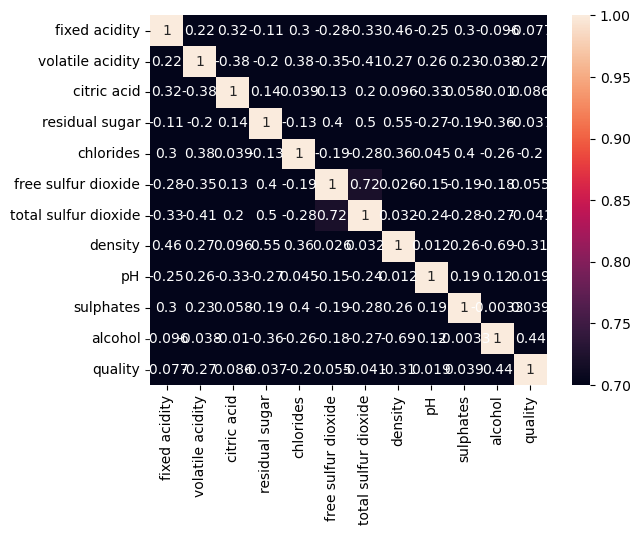

In [83]:
#check correlated features by visulaizing correlation matrix (use >0.7)
correlation_matrix = wine_data.corr()
sb.heatmap(correlation_matrix, annot=True, vmin=0.7)
plt.show()

In [84]:
#drop correlated features if there are any
print("There are no correlated features over 0.7")
print("data shape => ",wine_data.shape)

There are no correlated features over 0.7
data shape =>  (6497, 13)


# Model Development

In [85]:
# add a new column named "best quality" to the DataFrame df and indicate whether a particular row has a quality value greater than 5 (1) or not (0).
wine_data['best quality'] = np.where(wine_data['quality'] > 5, 1, 0)
wine_data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [86]:
#replace 0 and 1 with white and red categories
wine_data['type'] = np.where(wine_data['type'] == 'white', 0, 1)
wine_data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [87]:
#segregate features and the target variable from the dataset we will split it into 80:20 ratio for model selection.
x_data = wine_data[['type', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y_data = wine_data['best quality']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data ,test_size = 0.2, shuffle=False)

In [88]:
#Normalising the data before training help us to achieve stable and fast training of the model.

scaler = MinMaxScaler()

x_train_transformed = scaler.fit_transform(x_train)
x_test_transformed = scaler.transform(x_test)



In [100]:
#let’s train LogisticRegression(), XGBClassifier(), SVC(kernel='rbf').
lr = LogisticRegression()
xgb = XGBClassifier()
svc = SVC(kernel='rbf')

lr.fit(x_train_transformed,y_train)
xgb.fit(x_train_transformed,y_train)
svc.fit(x_train_transformed,y_train)

y_pred_lr = lr.predict(x_test_transformed)
y_pred_xgb = xgb.predict(x_test_transformed)
y_pred_svc = svc.predict(x_test_transformed)
print("Accuracy LR",accuracy_score(y_test,y_pred_lr))
print("Accuracy xgb",accuracy_score(y_test,y_pred_xgb))
print("Accuracy svc",accuracy_score(y_test,y_pred_svc))

Accuracy LR 0.7346153846153847
Accuracy xgb 0.6923076923076923
Accuracy svc 0.7376923076923076


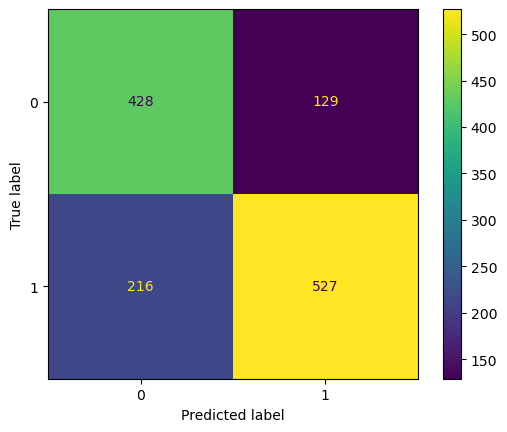

In [101]:
#compute confusion matrix and visualize
cm = confusion_matrix(y_test, y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

In [103]:
#Let’s also print the classification report for the best performing model.
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       557
           1       0.80      0.71      0.75       743

    accuracy                           0.73      1300
   macro avg       0.73      0.74      0.73      1300
weighted avg       0.74      0.73      0.74      1300

